## Google Play Store Apps

### Context and Dataset Overview:
Today, the digital landscape is dominated by mobile application, with over 1.85 million different apps available for users to download across various platforms. Android Users have even wider selection, with 2.56 million apps through the Google Play Store. Apps have fundamentally transformed the way we communicate, work, and entertain ourselves making them an essential part of modern lifestyle.

The dataset contains information about app names, categories, ratings, installs, sizes, prices, Android Version, and many more from 2010 to 2018. The dataset comprises 10,841 observations (rows) and 13 features (columns). Each row represents a unique observation set and each observation set contains the attributes.


### Objective Statement:
Our primary objective with the dataset are to:
- Identify the most popular app category
- Determine the app with the largest number of installs
- Gain actionable insights into app popularity and characteristics

### Dataset Description:
- Format: Tabular Data (Rows and Columns)
- Source: Kaggle (https://www.kaggle.com/lava18/google-play-store-apps)
- Features(Columns):13
- Observations(Rows):10,841

### Attributes Information
1. App :- Name of the App
2. Category :- Category under which the App falls.
3. Rating :- Application's rating on playstore
4. Reviews :- Number of reviews of the App.
5. Size :- Size of the App.
6. Install :- Number of Installs of the App
7. Type :- If the App is free/paid
8. Price :- Price of the app (0 if it is Free)
9. Content Rating :- Appropiate Target Audience of the App.
10. Genres:- Genre under which the App falls.
11. Last Updated :- Date when the App was last updated
12. Current Ver :- Current Version of the Application
13. Android Ver :- Minimum Android Version required to run the App

In [1]:
#Importing the necessary libraries:

import pandas as pd #For data manipulation and analysis using DataFrames
import numpy as np #For numerical operations
#Indicating the plot is displayed directly below the code cell that produced it
%matplotlib inline
import matplotlib.pyplot as plt #For creating visualization and plots
import seaborn as sns #For statistical data visualization
from sklearn.impute import KNNImputer #For handling missing values
import statsmodels.api as sm #For statistical modeling
import sys
from wordcloud import WordCloud #For generating word cloud visualization

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight') # Apply the FiveThirtyEight style for plots

In [2]:
#Reading the dataset from the csv file:
playstore=pd.read_csv("GooglePlayStore.csv",parse_dates=['Last Updated'])
playstore.shape

(10841, 13)

In [3]:
playstore.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [4]:
#Showing 4 random rows:
playstore.sample(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4778,Slendrina X,GAME,4.4,12736,56M,"1,000,000+",Free,0,Teen,Arcade,"December 18, 2017",1.02,4.0 and up
2225,Frozen Free Fall,FAMILY,4.3,1574204,37M,"50,000,000+",Free,0,Everyone,Puzzle;Action & Adventure,"July 27, 2018",6.7.0,4.2 and up
7021,Best Hairstyles step by step,BEAUTY,4.5,45452,9.2M,"5,000,000+",Free,0,Everyone,Beauty,"July 19, 2018",1.25,4.0 and up
1807,Disney Heroes: Battle Mode,GAME,4.6,102107,Varies with device,"5,000,000+",Free,0,Everyone 10+,Strategy,"July 31, 2018",1.2.2,Varies with device


In [5]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
playstore.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


The dataset comprises 10,841 observation (rows) and 13 features (columns). Initial inspection reveals a notable distribution in data types: 12 columns are currently classified as categorical variables and only 1 column is labeled as numerical. 

Upon closer examination, several columns- like Reviews, Size, Installs, and Price appear to contain numerical data. However, these features are currently stored as categorical (likely due to formatting issues, missing values, or any inconsistencies). To ensure integrity, I will conduct a detailed exploration of each relevant column.

In [7]:
playstore.isnull().mean()*100

App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64

Upon reviewing the dataset, we can observe the following:
- **Rating:** Approximately, 13.6% of the data in `Rating` columns is missing. This is a significant proportion and requires careful consideration for imputation or exclusion.
- **Other Columns(Type, Content Rating, Current Version, and Andriod Version):** Each of these columns contains less than 5% missing values. Since the proportion is relatively low, it is reasonable to consider removing the affected rows.

#### Extracting the dates:

In [8]:
playstore['Last Updated'] = pd.to_datetime(playstore['Last Updated'], errors='coerce')

In [9]:
# Extracting month,year,day and weekday from Last Updated feature
playstore['Month'] = playstore['Last Updated'].dt.month.astype('Int64')
playstore['Year'] = playstore['Last Updated'].dt.year.astype('Int64')
playstore['Day'] = playstore['Last Updated'].dt.day.astype('Int64')
playstore['Weekday'] = playstore['Last Updated'].dt.day_name()

In [10]:
playstore['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [11]:
playstore['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [12]:
#Dropping the column Genres
playstore.drop(columns=['Genres','Last Updated'],inplace=True)

Upon closer inspection of the dataset, I identified that the `Category` and `Genres` columns contain overlapping information regarding the type or classification of apps. While `Genres` column may provide a detailed classification, the `Category` column offers a concise and standardized categorization that is generally sufficient for most analytical purpose. Thus, I have planned to drop `Genres` column for managing redundant features. Moreover, I have also dropped `Last Updated` feature as it is no longer required since we have constructed new useful features from it.

In [13]:
playstore[playstore.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Current Ver,Android Ver,Month,Year,Day,Weekday
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Varies with device,4.0.3 and up,2,2018,26,Monday
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Varies with device,Varies with device,7,2018,31,Tuesday
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,2.19.0.204537701,4.4 and up,7,2018,24,Tuesday
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,4.1.28165.0716,4.0 and up,7,2018,20,Friday
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,4.3.0.508,4.4 and up,7,2018,16,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Varies with device,Varies with device,4,2018,6,Friday
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Varies with device,Varies with device,8,2018,6,Monday
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Varies with device,Varies with device,6,2018,27,Wednesday
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,0.6.88,5.0 and up,6,2018,1,Friday


In [14]:
def findduplicate(dataframe):
    print("Checking Duplicates:")
    num_duplicates=playstore.duplicated(subset=None,keep='first').sum()
    if num_duplicates>0:
        print(f"There are {num_duplicates} in the dataset")
        playstore.drop_duplicates(keep="first",inplace=True)
        print(f"{num_duplicates} of duplicates are deleted!")
    else:
        print("There are no duplicates!")

In [15]:
findduplicate(playstore)

Checking Duplicates:
There are 483 in the dataset
483 of duplicates are deleted!


The dataset intially consisted of **483 duplicate records** and using the appropriate function all duplicate values were successfully removed ensuring that each entry in the dataset is now unique.

#### Working with the Price feature:

In [16]:
#All the distinct values of price:
playstore['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [17]:
playstore['Price']=playstore['Price'].str.replace("$","")

In [18]:
playstore['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       'Everyone', '1.20', '1.04'], dtype=object)

In [19]:
playstore[playstore['Price']=="Everyone"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Current Ver,Android Ver,Month,Year,Day,Weekday
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,4.0 and up,NaN,<NA>,<NA>,<NA>,NaN


The observation at index 10472 appears to be left-shifted. This means that the values in several columns (e.g. Category to Android Version) are not correctly aligned with their intended headers. While, it is technically possible to rectify this misalignment by shifting the column to the right, I have decided to just drop it since this observation also consists of numerous null values and does not provide significant or reliable information for analysis.

In [20]:
playstore.drop(index=[10472],inplace=True)

In [21]:
playstore['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [22]:
playstore['Price']=playstore['Price'].astype(float)

#### Working with the Size feature:

In [23]:
playstore['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [24]:
def convertSize(val):
    if 'M' in val:
        return float(val.replace('M','')) *1000000
    elif 'k' in val:
        return float(val.replace('k','')) *1000
    else:
        return np.nan

In [25]:
playstore['Size'] =playstore['Size'].apply(convertSize)

In [26]:
playstore['Size']=playstore['Size'].astype(float)

#### Working with the Installs feature:

In [27]:
playstore['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [28]:
playstore['Installs']=playstore['Installs'].str.replace('+','')
playstore['Installs']=playstore['Installs'].str.replace(',','')

In [29]:
playstore['Installs']=playstore['Installs'].astype(int)

#### Working with the Reviews feature:

In [30]:
playstore['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'],
      shape=(6001,), dtype=object)

In [31]:
playstore['Reviews']=playstore['Reviews'].astype(int)

In [32]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int64  
 4   Size            8831 non-null   float64
 5   Installs        10357 non-null  int64  
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Current Ver     10349 non-null  object 
 10  Android Ver     10355 non-null  object 
 11  Month           10357 non-null  Int64  
 12  Year            10357 non-null  Int64  
 13  Day             10357 non-null  Int64  
 14  Weekday         10357 non-null  object 
dtypes: Int64(3), float64(3), int64(2), object(7)
memory usage: 1.3+ MB


In [33]:
playstore.isnull().mean()*100

App                0.000000
Category           0.000000
Rating            14.145023
Reviews            0.000000
Size              14.733996
Installs           0.000000
Type               0.009655
Price              0.000000
Content Rating     0.000000
Current Ver        0.077242
Android Ver        0.019311
Month              0.000000
Year               0.000000
Day                0.000000
Weekday            0.000000
dtype: float64

I have performed data cleaning and transformation steps on the columns `Price`,`Size`, and `Reviews` by removing non-numeric characters:
- **Price:** Removed the currency symbol and converted it to float.
- **Size:** Removed the character, and M and k and also converted them to consistent numeric format and converted it to integer.
- **Reviews:** Ensured the column contains only numeric value and converted it to integer.

Since the `Size` column consisted of string `"Varying with Device"` in some rows which does not represent a meaningful or consistent size, I replaced these entries with **np.nan** to denote missing value. This replacement introduced 14.7% null values in the Size column.

In [34]:
playstore.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,8892.0,4.187877,0.522377,1.0,4.0,4.3,4.5,5.0
Reviews,10357.0,405904.610602,2696777.836748,0.0,32.0,1680.0,46416.0,78158306.0
Size,8831.0,21287788.30257,22540247.459495,8500.0,4700000.0,13000000.0,29000000.0,100000000.0
Installs,10357.0,14157759.440668,80239553.869019,0.0,1000.0,100000.0,1000000.0,1000000000.0
Price,10357.0,1.0308,16.278625,0.0,0.0,0.0,0.0,400.0
Month,10357.0,6.397026,2.606359,1.0,5.0,7.0,8.0,12.0
Year,10357.0,2017.382929,1.112766,2010.0,2017.0,2018.0,2018.0,2018.0
Day,10357.0,15.619098,9.528658,1.0,6.0,16.0,24.0,31.0


After the data cleaning, we have identified eight numerical features. All the values in these columns have been checked and is found to be valid with no duplicate records and some missing values that I will impute using KNN imputer.

#### Pairplot

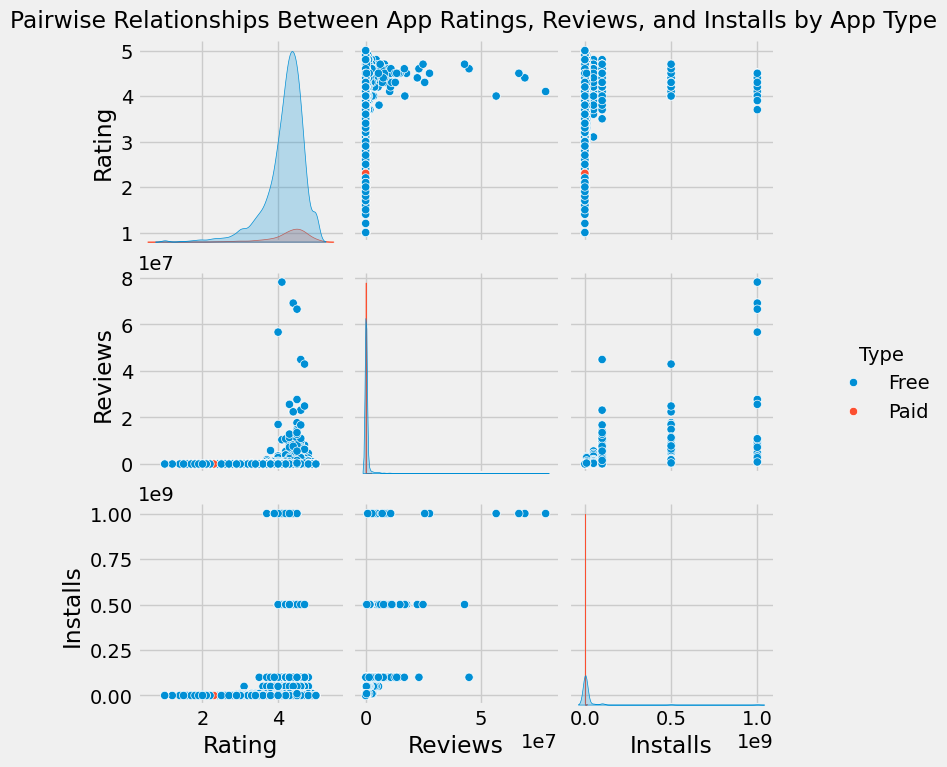

In [35]:
pp = sns.pairplot(playstore, vars=['Rating', 'Reviews', 'Installs'], hue='Type')

pp.fig.suptitle("Pairwise Relationships Between App Ratings, Reviews, and Installs by App Type", y=1.02)
plt.show()

To get a general overview of the distribution and realtionship of numerical columns, I also plotted a `Pairplot`.

The pairplot reveals a strong positive correlation between the number of installs and reviews, indicating that popular apps receive more user feedback. There is also a moderate positive relationship between app ratings and installs, suggesting that higher-rated apps are more likely to be downloaded. Free apps dominate in both installs and reviews compared to paid apps, which typically receive fewer downloads and more critical feedback. The distribution of ratings is left-skewed, with most apps rated highly, but the spread narrows as install numbers increase. These patterns highlight that app type, popularity, and user engagement are closely linked on the Google Play Store.

#### Working with the missing values:

In [36]:
#Extracting all the columns with missing values greater than 0 and lesser than 5:
missing_cols1=[val for val in playstore.columns if 0<playstore[val].isnull().mean()*100<5]
missing_cols1

['Type', 'Current Ver', 'Android Ver']

In [37]:
missing_cols2=[val for val in playstore.columns if 5<playstore[val].isnull().mean()*100<50]
missing_cols2

['Rating', 'Size']

In [38]:
playstore.dropna(subset=missing_cols1,inplace=True)

In [39]:
#Function to plot the Histogram and boxplot for numerical column:
def plot_graph(numerical_column):
    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,6))
    sns.histplot(data=playstore,x=numerical_column,fill=True,ax=ax[0],color='red',kde=True)
    ax[0].set_title(f"Histogram of {numerical_column}")
    ax[0].set_xlabel(numerical_column)
    ax[0].set_ylabel("Density")
    
    sns.boxplot(data=playstore,y=numerical_column,ax=ax[1])
    ax[1].set_title(f"Boxplot of {numerical_column}")
    ax[1].set_ylabel(numerical_column)

    #Summary statistics:
    mean=playstore[numerical_column].mean()
    median=playstore[numerical_column].median()
    std=playstore[numerical_column].std()
    skew=playstore[numerical_column].skew()

    stats_text=(
        f"Mean:{round(mean,2)}\n"
        f"Median:{round(median,2)}\n"
        f"Std:{round(std,2)}\n"
        f"Skewness:{round(skew,2)}\n"
     )

    ax[0].text(
        0.98,0.98,
        stats_text,
        ha='right',
        va='top',
        transform=ax[0].transAxes,
        bbox=dict(facecolor='white', alpha=0.7,edgecolor='black',linewidth=1.5),
        fontsize=10
    )

    plt.show()

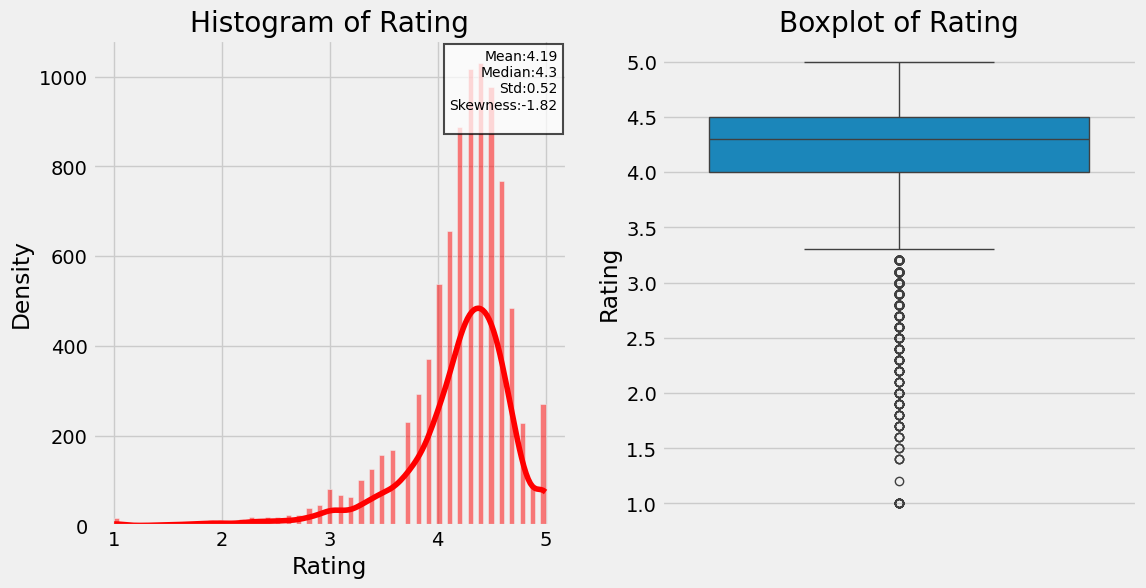

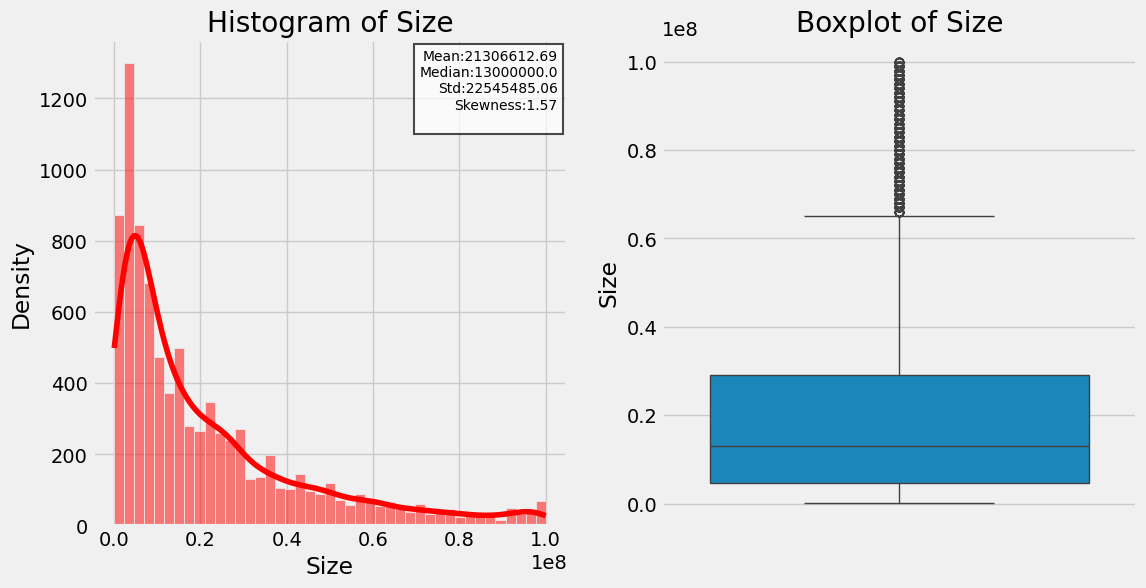

In [40]:
for cols in missing_cols2:
    plot_graph(cols)

Upon inspecting the features consisting of missing values `Rating` and `Size`, I conducted a distribution analysis.

1. **Rating:**
   - Distribution: The rating feature exhibits a left-skewed distribution. This indicates that most of the apps rating is clustered towards the higher end of the scale, with a longer tail extending towards lower values.
   - Outliers: The distribution also contains of significant numbers of outliers, likely representing usually low ratings relative to the majority.
2. **Size:**
   - Distribution: The size feature is right-skewed with most of the apps having relatively smaller size, but there is long tail of apps which have much larger size.
   - Outliers: As with Rating, the Size feature consists of numerous outliers, particularly at the upper end of the distribution. 

In [41]:
numerical_cols=[cols for cols in playstore.columns if playstore[cols].dtype in ['float64','int64','Int64'] and cols!='Rating']
numerical_cols

['Reviews', 'Size', 'Installs', 'Price', 'Month', 'Year', 'Day']

In [42]:
categorical_cols=[cols for cols in playstore.columns if playstore[cols].dtype in ['object']]
categorical_cols

['App',
 'Category',
 'Type',
 'Content Rating',
 'Current Ver',
 'Android Ver',
 'Weekday']

In [43]:
playstore[(playstore['Rating'].isnull()) & (playstore['Size'].isnull())]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Current Ver,Android Ver,Month,Year,Day,Weekday
2485,OMD Protocols,MEDICAL,NaN,0,NaN,10,Free,0.00,Everyone,1.0,Varies with device,7,2018,27,Friday
3258,SD card backup,TOOLS,NaN,142,NaN,1000000,Free,0.00,Everyone,Varies with device,Varies with device,3,2017,27,Monday
4137,F-1 watchface by Delta,PERSONALIZATION,NaN,0,NaN,10,Paid,2.49,Everyone,Varies with device,Varies with device,8,2017,23,Wednesday
4218,D+H Reaction Wall,GAME,NaN,0,NaN,1,Paid,0.99,Everyone,Varies with device,Varies with device,7,2016,24,Sunday
4504,Q Actions - Digital Assistant,PRODUCTIVITY,NaN,0,NaN,500,Free,0.00,Everyone,Varies with device,Varies with device,7,2018,20,Friday
5096,Elim AG,LIFESTYLE,NaN,7,NaN,100,Free,0.00,Everyone,1.0,4.2 and up,3,2017,31,Friday
5098,AG Subway Simulator Pro,FAMILY,NaN,0,NaN,1000,Free,0.00,Everyone,Varies with device,Varies with device,7,2018,27,Friday
5115,Alabama Ag Credit Ag Banking,FINANCE,NaN,0,NaN,100,Free,0.00,Everyone,5.3.4,4.4 and up,2,2018,9,Friday
5134,Woodland AH,MEDICAL,NaN,0,NaN,50,Free,0.00,Everyone,300000.0.97,4.0.3 and up,2,2018,2,Friday
5208,ai.Bot Box,PRODUCTIVITY,NaN,0,NaN,10000,Free,0.00,Everyone,Varies with device,Varies with device,3,2017,1,Wednesday


In [44]:
#Creating a copy of the dataframe
playstore_copy = playstore.dropna(subset=['Rating', 'Size'], how='all')

In [45]:
playstore_copy.isnull().mean()*100

App                0.000000
Category           0.000000
Rating            13.635922
Reviews            0.000000
Size              14.267664
Installs           0.000000
Type               0.000000
Price              0.000000
Content Rating     0.000000
Current Ver        0.000000
Android Ver        0.000000
Month              0.000000
Year               0.000000
Day                0.000000
Weekday            0.000000
dtype: float64

In [46]:
imputer=KNNImputer()
cols=['Rating','Size']

In [47]:
playstore_copy[cols]=imputer.fit_transform(playstore_copy[cols])

In [48]:
playstore_copy.isnull().mean()*100

App               0.0
Category          0.0
Rating            0.0
Reviews           0.0
Size              0.0
Installs          0.0
Type              0.0
Price             0.0
Content Rating    0.0
Current Ver       0.0
Android Ver       0.0
Month             0.0
Year              0.0
Day               0.0
Weekday           0.0
dtype: float64

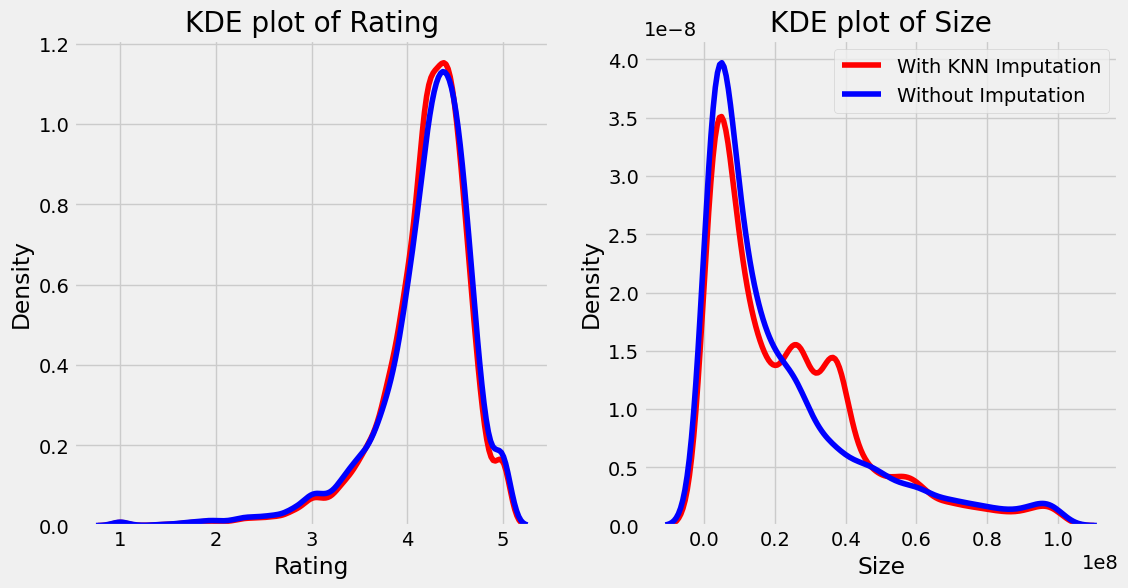

In [49]:
#KDE plot to analyze the distribution of Rating and Size before and after imputation:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,6))

sns.kdeplot(data=playstore_copy,x='Rating',color='red',ax=ax[0],label='With KNN Imputation')
sns.kdeplot(data=playstore,x='Rating',color='blue',ax=ax[0],label='Without Imputation')
ax[0].set_title("KDE plot of Rating")
ax[0].set_xlabel("Rating")
ax[0].set_ylabel("Density")

sns.kdeplot(data=playstore_copy,x='Size',color='red',ax=ax[1],label='With KNN Imputation')
sns.kdeplot(data=playstore,x='Size',color='blue',ax=ax[1],label='Without Imputation')
ax[1].set_title("KDE plot of Size")
ax[1].set_xlabel("Size")
ax[1].set_ylabel("Density")

plt.legend()
plt.show()

I have followed numerous strategies to deal with the null values to maximize data retention. For features like `Type`,`Current Ver`,`Android Ver` having missing values less than 5% I have removed all the observations assuming that the values were missing completely at random (MCAR). Moreover, for rows that have both `Rating` and `Size` missing, I have also removed them. Lastly, `Rating` and `Size` contains 13.6% and 14.2% missing values respectively and removing these observation is not an optimal approach. Thus, I have used **KNN Imputer** to impute the missing values for these columns. 

The distribution from the KDE plot above shows that KNN imputation has not affected the distribution of `Rating` which means that the original information for `Rating` is preserved. However, the distribution of Size has changed slightly. This suggests that the imputed values introduced minor changes.

In [50]:
#Analyzing the changes in varaince after KNN imputation:
print("Rating")
print("Original Varaince is:",playstore['Rating'].var())
print("Varaince after KNN imputation is:",playstore_copy['Rating'].var())
print("-"*60)
print("Size")
print("Original Varaince is:",playstore['Size'].var())
print("Varaince after KNN imputation is:",playstore_copy['Size'].var())

Rating
Original Varaince is: 0.272930958779949
Varaince after KNN imputation is: 0.24495309693708736
------------------------------------------------------------
Size
Original Varaince is: 508298896467685.94
Varaince after KNN imputation is: 471792094500409.75


The variance of `Rating` decreased slightly after KNN imputation, but the change is relatively minor which indicates that the overall variability is preserved. 
The variance of `Size` is extremely large which is expected given the wide range of app size. After KNN imputation, the variance decreased by a small margin relative to the scale of the data.

### Exploratory Data Analysis:

#### 1) Most popular Category Overall: Which is the most popular app category? 

In [51]:
category_counts = playstore_copy['Category'].value_counts().to_dict()

In [52]:
wc=WordCloud(width=1000, height=600, min_font_size=10, background_color='black').generate_from_frequencies(category_counts)

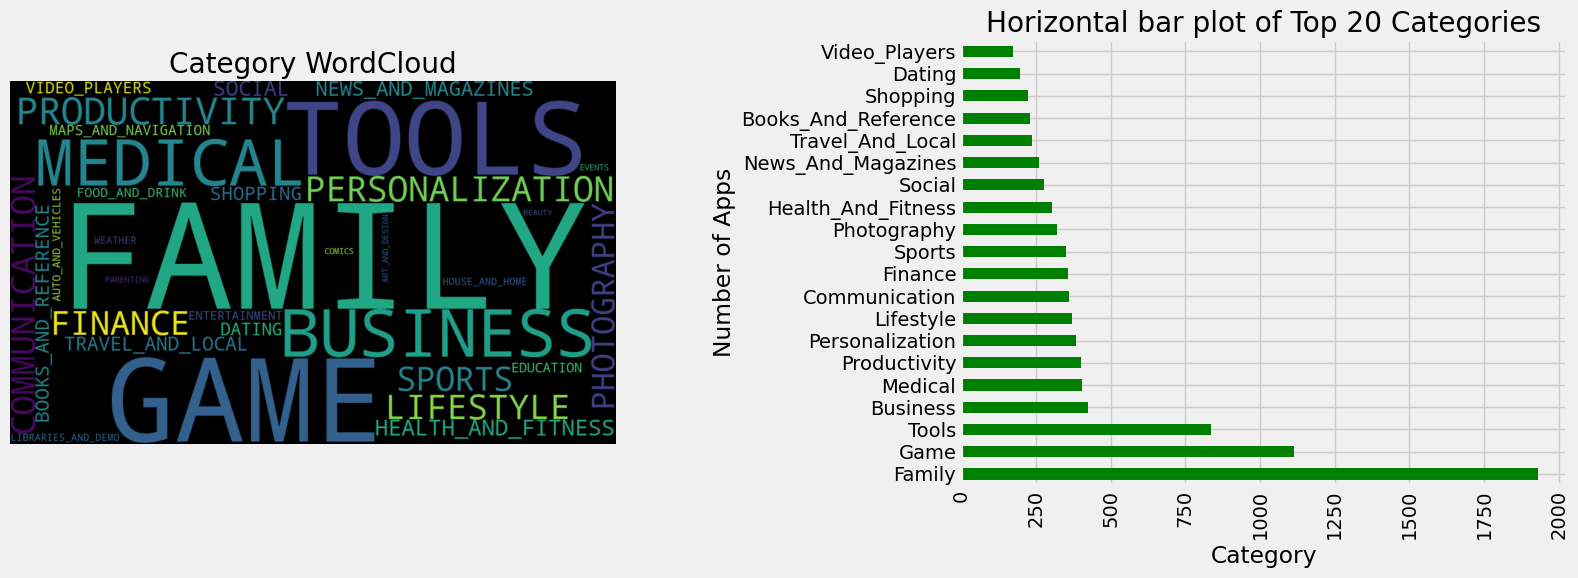

In [53]:
fig,ax=plt.subplots(1,2,figsize=(16,6))

#WordCloud on the left
ax[0].imshow(wc,interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title('Category WordCloud')

#Horizontal bar plot in the right
playstore_copy['Category'].str.title().value_counts().head(20).plot(kind='barh',ax=ax[1],color='green')
ax[1].set_title("Horizontal bar plot of Top 20 Categories")
ax[1].set_ylabel("Number of Apps")
ax[1].set_xlabel("Category")
ax[1].tick_params(axis='x',rotation=90)


plt.tight_layout(w_pad=5)
plt.show()

**WordCloud:** It displays the frequency of app categories as a word cloud. Larger words indicate categories with more apps. `Family, Game, Tools, and Medical` are the most prominent, suggesting that these are the most common app categories. 

**Horizontal bar plot:** It shows the top 20 app categories by the number of apps. `Family` leads by a significant margin, followed by `Game, Tools, and Medical`.The remaining categories have relatively fewer apps. `Video_Players and Books_And_Reference` are at the lower end.

In [54]:
#Filtering apps with 5 star rating:
full_rating=playstore_copy[playstore_copy['Rating']==5]

In [55]:
print(f"There are {full_rating.shape[0]} apps that have 5 star rating")

There are 271 apps that have 5 star rating


In [56]:
text2 = ' '.join(full_rating['Category'].str.title())

In [57]:
wc=WordCloud(width=1000, height=600, min_font_size=10, background_color='black').generate(text2)

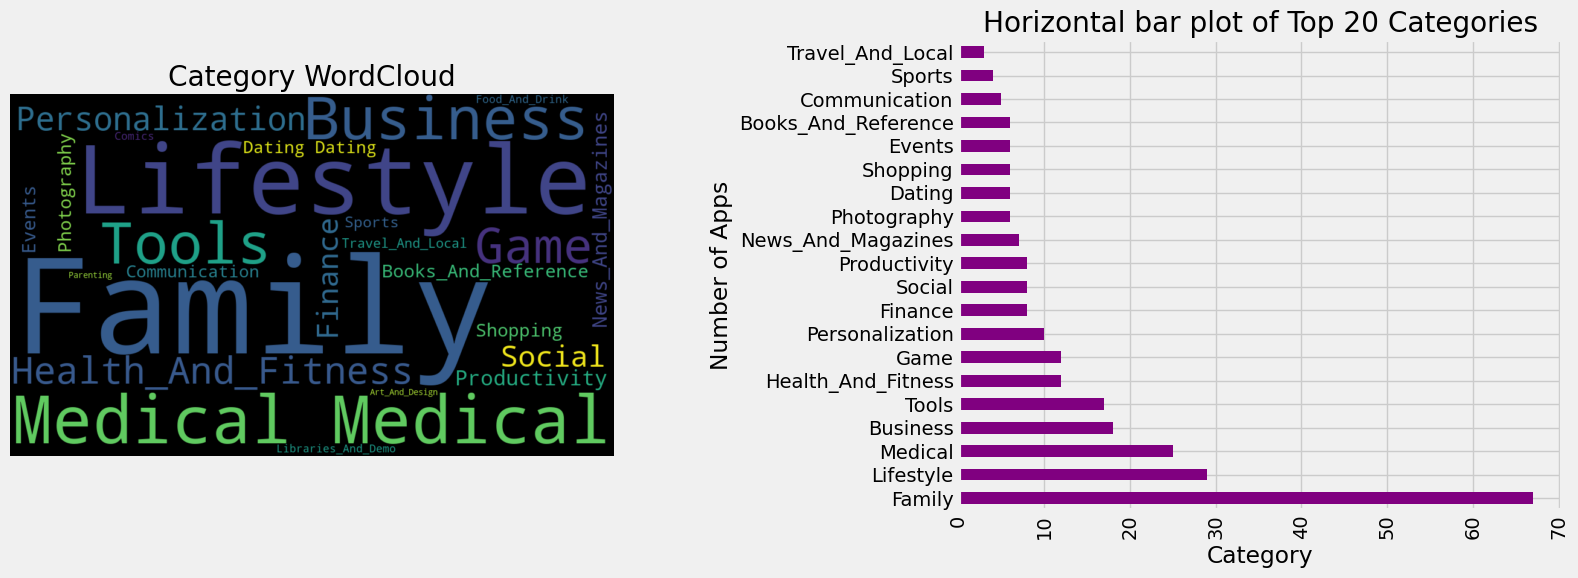

In [58]:
fig,ax=plt.subplots(1,2,figsize=(16,6))

#WordCloud on the left
ax[0].imshow(wc,interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title('Category WordCloud')

#Horizontal bar plot in the right
full_rating['Category'].str.title().value_counts().head(20).plot(kind='barh',ax=ax[1],color='purple')
ax[1].set_title("Horizontal bar plot of Top 20 Categories")
ax[1].set_ylabel("Number of Apps")
ax[1].set_xlabel("Category")
ax[1].tick_params(axis='x',rotation=90)


plt.tight_layout(w_pad=5)
plt.show()

Goal: To identify the most popular app categories that achieve a perfect 5-star rating.

**WordCloud:** `Family, Lifestyle, Medical` are the most prominent app categories indicating that these are among the most popular categories for app with top ratings. 
These categories may offer high-quality apps that consistently meet user expectations.

**Horizontal bar plot:** `Family` is the category with the highest number of apps achieving a perfect 5-star rating.`Lifestyle and Medical` follow, but notably fewer apps(Lifestyle has fewer than 500 apps in this analysis).
`Family` apps may recieve a high rating due to their utility. Lifestyle apps, though less in number, are highly rated. This could be because users in this category such as those tracking daily health and fitness are more engaged and satisfied with the apps they use. 

#### 2) How does the number of reviews relate to the app rating? 

In [59]:
playstore_copy['Reviews'].describe()

count    1.028900e+04
mean     4.085848e+05
std      2.705473e+06
min      0.000000e+00
25%      3.400000e+01
50%      1.769000e+03
75%      4.746300e+04
max      7.815831e+07
Name: Reviews, dtype: float64

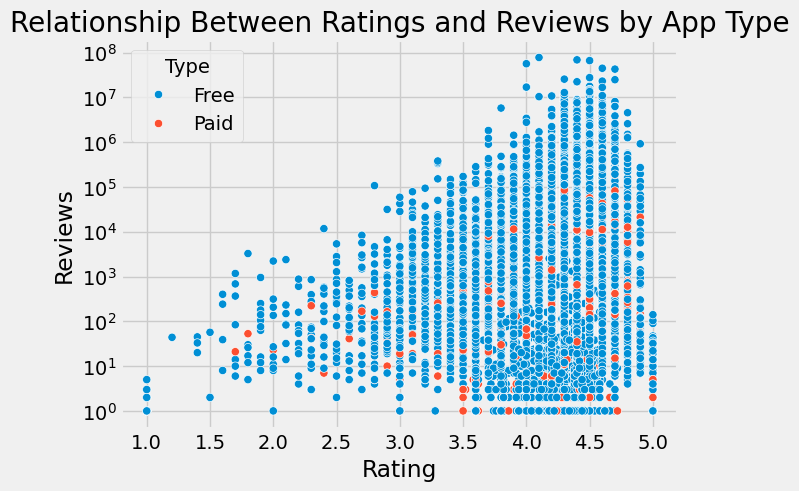

In [60]:
#Scatterplot of Reviews and Rating:
sns.scatterplot(data=playstore_copy,x='Rating',y='Reviews',hue='Type')

plt.yscale('log')
plt.title("Relationship Between Ratings and Reviews by App Type")
plt.show()

The **Scatter Plot** shows the relationship between rating and reviews. Free apps dominate the plot, indicating that they are much more common than paid apps. The plot highlights the dominance and popularity of free apps in the Play Store.

Most apps, both paid and free, have rating between 3 and 5. Higher rating are densely populated.

Since the number of reviews varies widely, from a low scale as 0 to 10 million, shown on the logarithmic scale, apps with higher rating tends to have more reviews, especially among free apps. 

#### 3) Plot Heatmap of the correlations

In [61]:
#Query to get the numeric columns (attributes)
numerical_features=[cols for cols in playstore_copy.columns if playstore_copy[cols].dtype in ['float64','int64','Int64']]
numerical_features

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Month', 'Year', 'Day']

In [62]:
#Getting the correlations between pair of columns 
playstore_corr=playstore_copy[numerical_features].corr()
playstore_corr

,Rating,Reviews,Size,Installs,Price,Month,Year,Day
Rating,1.000000,0.067778,0.073629,0.050345,-0.019012,0.018483,0.126707,-0.009779
Reviews,0.067778,1.000000,0.155689,0.634935,-0.009459,0.044627,0.075910,-0.024665
Size,0.073629,0.155689,1.000000,0.125751,-0.027678,0.044017,0.234343,-0.012864
Installs,0.050345,0.634935,0.125751,1.000000,-0.011196,0.053792,0.087575,-0.043585
Price,-0.019012,-0.009459,-0.027678,-0.011196,1.000000,0.006414,-0.005610,-0.008411
Month,0.018483,0.044627,0.044017,0.053792,0.006414,1.000000,-0.191585,-0.073815
Year,0.126707,0.075910,0.234343,0.087575,-0.005610,-0.191585,1.000000,-0.015467
Day,-0.009779,-0.024665,-0.012864,-0.043585,-0.008411,-0.073815,-0.015467,1.000000


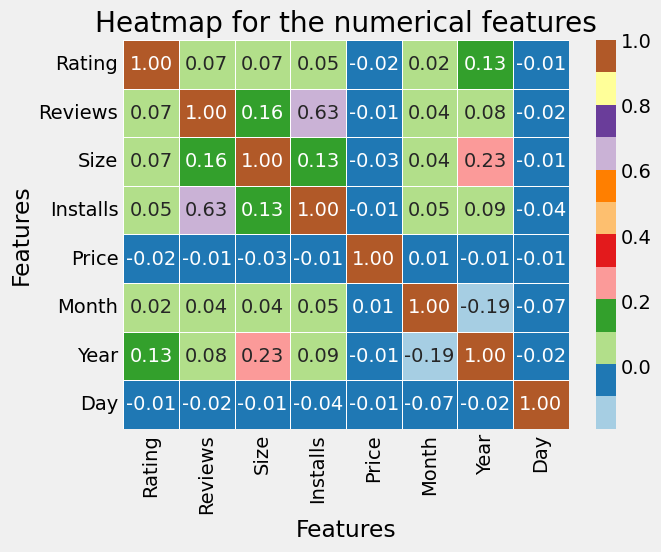

In [63]:
#Heatmap
sns.heatmap(data=playstore_corr,cmap="Paired",annot=True,fmt='.2f',linewidths=0.5)

plt.title("Heatmap for the numerical features")
plt.xlabel("Features")
plt.ylabel("Features")

plt.show()

`Heatmap` displays the correlation coefficients between numerical features in the dataset: `Rating,Reviews,Size,Installs, and Price`.
- **Reviews and Installs(Correlation=0.63):** The strong positive correlation implies that as the number of installs increases the review that a particular app receives also increases. This is intuitive- more users downloading apps would naturally lead to a higher likelihood of receiving a feedback through reviews.

- **Size and Year(Correlation=0.23):** The moderately positive correlation suggests that on average app size increases over time. This trend likely reflects user expectation: as user demand more feature, better graphics, and smoother experiences, companies respond by enhancing their apps, which often results in larger app sizes.


- **Price VS Other Features(Negative Correlation):** Price shows a weak negative correlation with most of the features.
  - **Price and Installs:** Users are more inclined towards downloading free apps than paid one
  - **Price and Reviews:** With fewer installs there are fewer users who can leave reviews, hence the negative relationship.
  - **Price and Rating:** One possible explanation for this weak relation is, since the apps are paid, apps users may have higher expectations. If the apps fails to deliver sufficient value for the cost, users may give lower rating, contributing to negative correlation.
    
    
- **Other Weak Correlation:** Most other relationships, such as `Size VS Rating` or `Rating VS Reviews`, exhibit a weak correlation, indicating that these pairs do not have strong linear relationships in the dataset.

#### 4. How does the average app size vary across different app categories in the Play Store? 

In [64]:
playstore_copy['Category']=playstore_copy['Category'].str.title()

In [65]:
#Using a query to getting the average app size per Category
mean_size=playstore_copy.groupby('Category')['Size'].mean().sort_values(ascending=False)
mean_size.head() #Showing the resulting query

Category
Game                4.306876e+07
Entertainment       2.967982e+07
Family              2.858872e+07
Travel_And_Local    2.734437e+07
Sports              2.589104e+07
Name: Size, dtype: float64

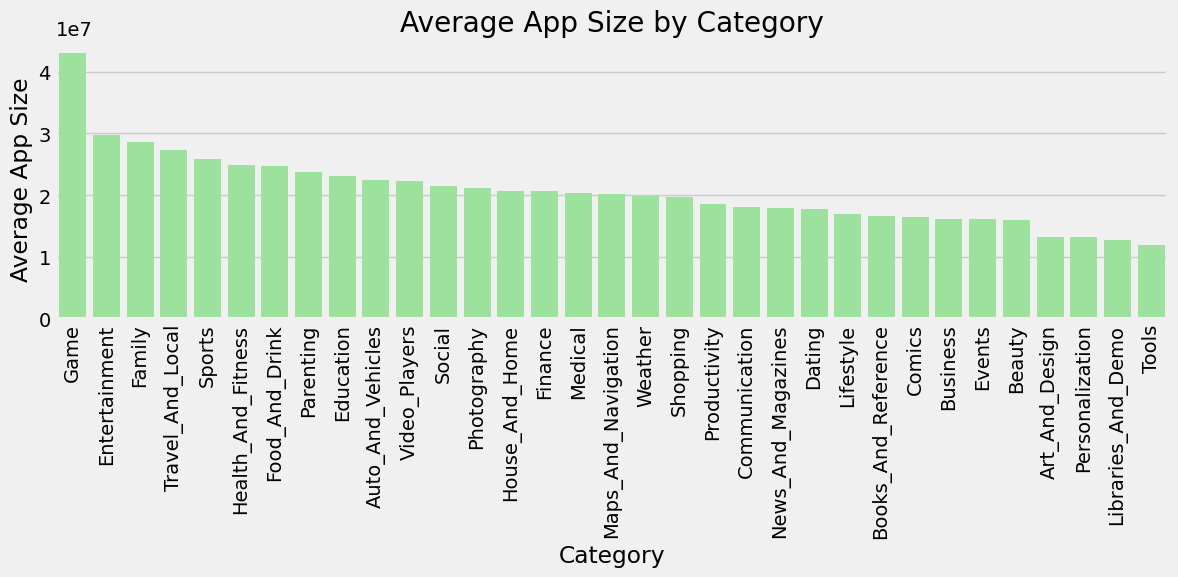

In [66]:
plt.figure(figsize=(12,6))
sns.barplot(x=mean_size.index,y=mean_size.values,color='lightgreen')

plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Average App Size')
plt.title('Average App Size by Category')


plt.tight_layout()
plt.show()

The `Barplot` illustrates the average app size of each category in the Google Play Store.

- **Game:** Apps that fall under the Game category on average have the highest size. This is likely because games often require high-quality graphics and complex user interface, all contributing to larger file sizes.
- **Tools, Art, and Libraries:** These category have the smallest average app sizes. These apps are typically less interactive and focus on providing specific functionalities which do not require complex graphics.

**Overall Insight**
There is a clear variation in average app size across different categories, reflecting the nature and functionality of the apps within each category.

#### 5) What are the Top 5 most installed Apps in Each popular Categories ?

In [67]:
playstore_copy.sample(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Current Ver,Android Ver,Month,Year,Day,Weekday
9999,EW Handbook,Business,4.04,1,17000000.0,100,Free,0.00,Everyone,4,2.3.3 and up,6,2015,11,Thursday
7037,BZ Reminder PRO,Business,4.80,726,5400000.0,1000,Paid,3.99,Everyone,2.3.3,4.1 and up,12,2017,20,Wednesday


In [68]:
apps_category=playstore_copy.groupby(['Category','App'])['Installs'].sum().reset_index()

In [69]:
apps_category=apps_category.sort_values('Installs',ascending=False)
popular_group=['Family','Lifestyle','Game','Social']

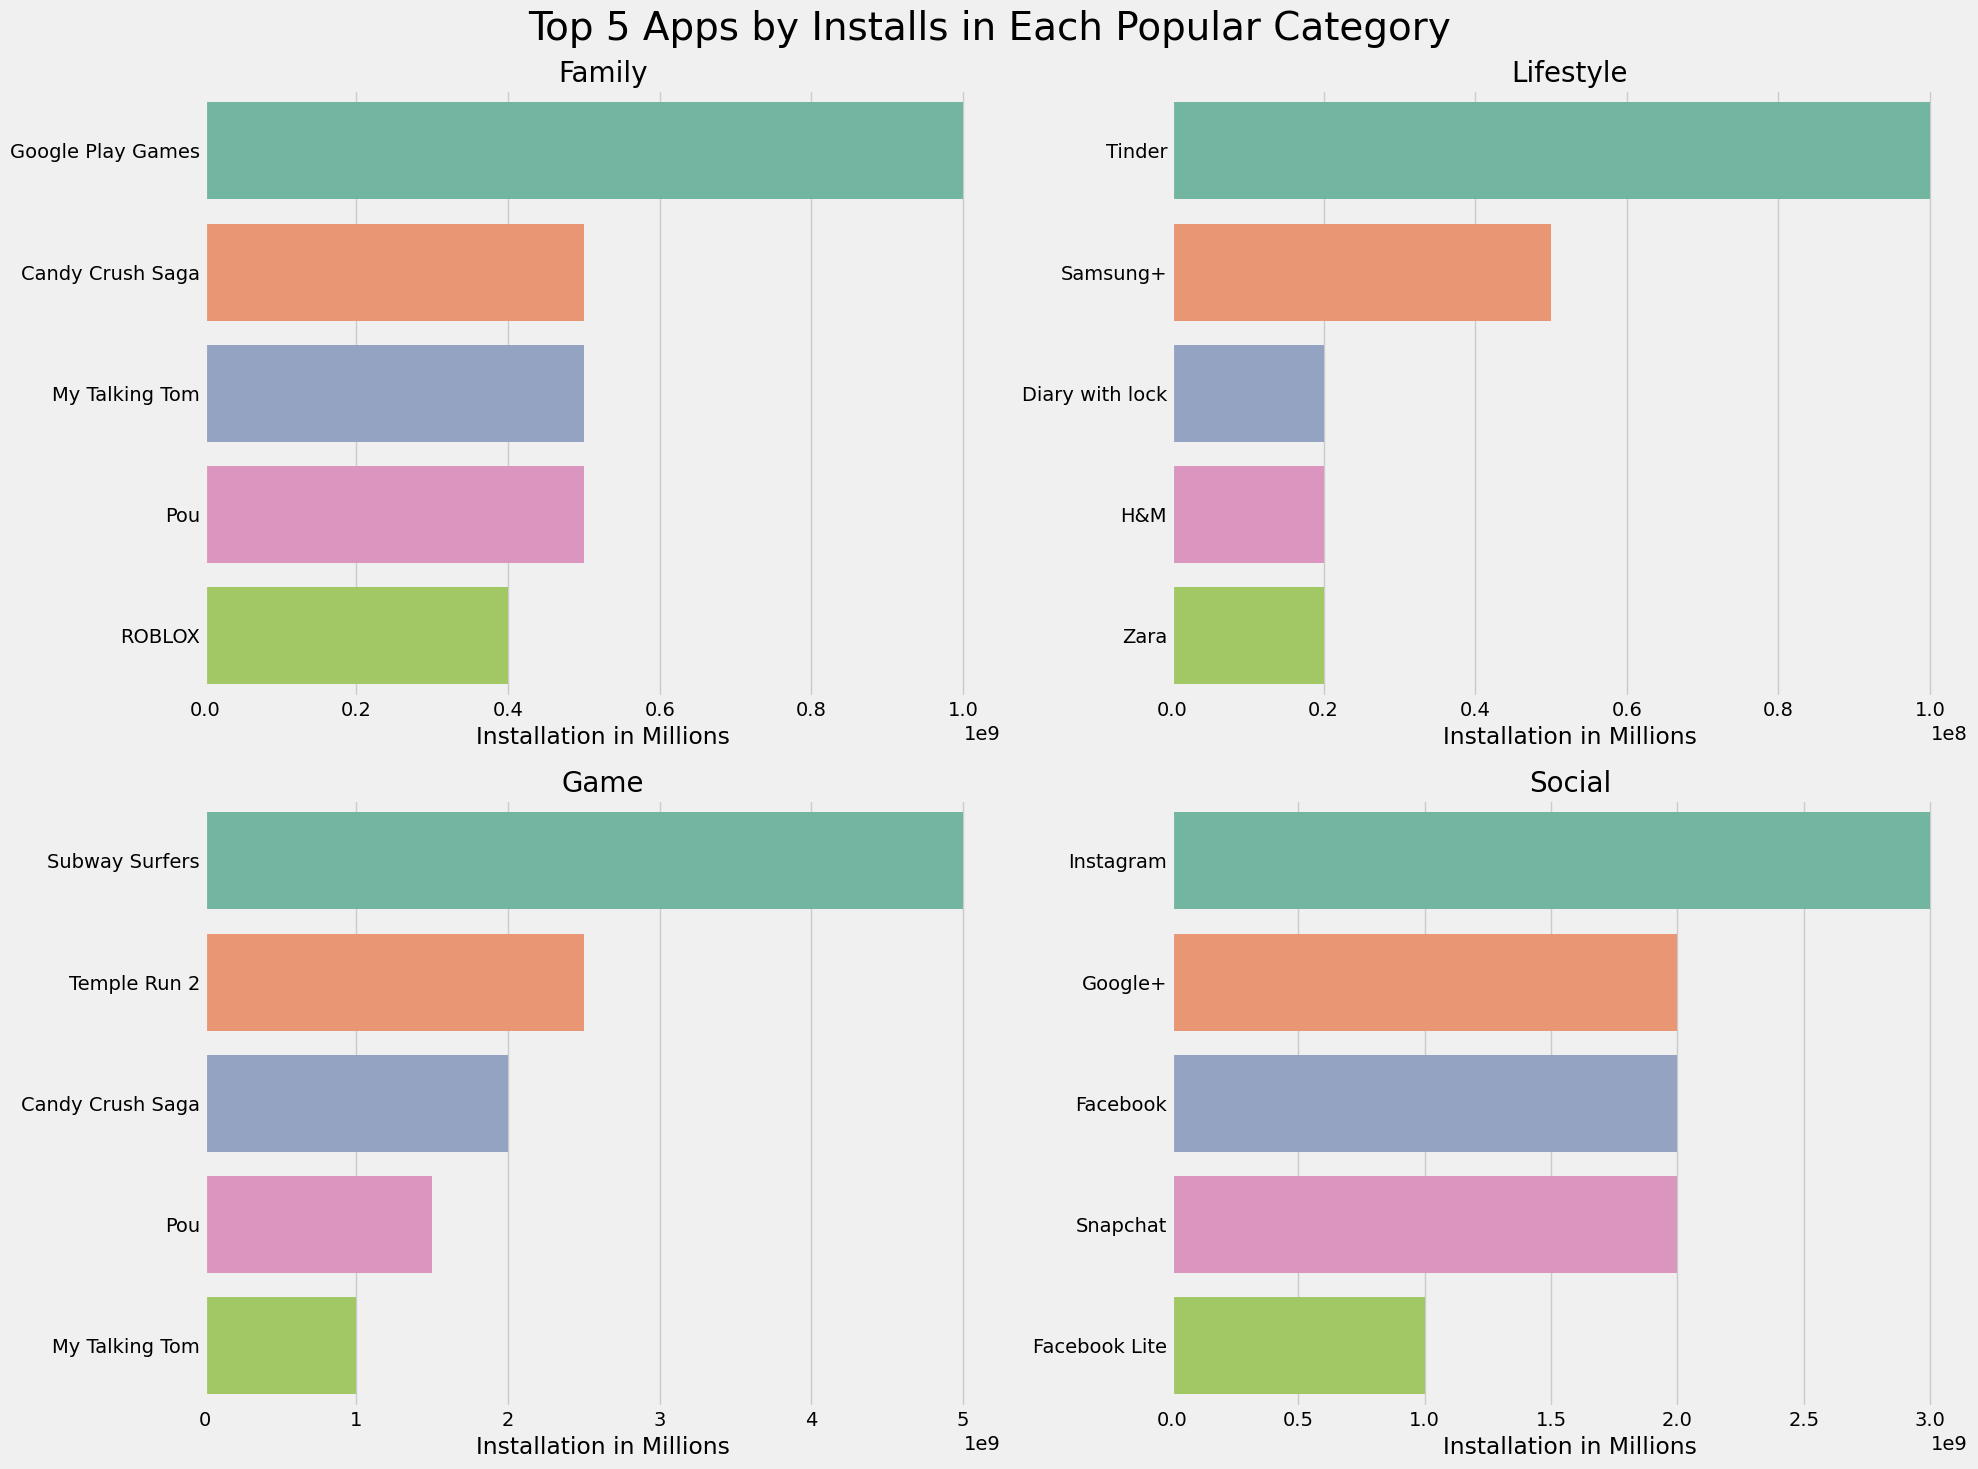

In [70]:
plt.figure(figsize=(20, 15))
for index,app in enumerate(popular_group):
    df1=apps_category[apps_category['Category']==app].head(5)
    plt.subplot(2,2,index+1)
    sns.barplot(data=df1,x='Installs',y='App',palette='Set2')
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)

plt.suptitle('Top 5 Apps by Installs in Each Popular Category',size=28) 
plt.tight_layout()
plt.show()

The groupby function was utilized, on the `Horizontal bar plot`, to aggregate the dataset by `Category` feature and compute the total number of installs for each app within its respective category. For the most popular categories like- Family, Lifestyle, Game, Social-, the apps with the highest  number of installs were identified.

`Family`: Google Play Games is the most installed app in this category.

`Lifestyle`: Tinder ranks as the most installed app.

`Game`: Subway Surfers has the highest number of installs.

`Social`: Instagram is the leading app in terms of installs.

#### 6) Maximum installs per Category over time

In [71]:
max_installs=playstore_copy.groupby(['Category','Year'])['Installs'].max().reset_index().sort_values(by='Installs',ascending=False)
max_installs

,Category,Year,Installs
15,Books_And_Reference,2018,1000000000
59,Family,2018,1000000000
47,Entertainment,2018,1000000000
34,Communication,2018,1000000000
136,Photography,2018,1000000000
...,...,...,...
16,Business,2011,1000
105,Maps_And_Navigation,2014,1000
150,Social,2013,1000
170,Travel_And_Local,2013,1000


In [72]:
top_categories = (
    max_installs.groupby('Category')['Installs']
    .max()
    .sort_values(ascending=False)
    .head(5)
    .index
)
filtered = max_installs[max_installs['Category'].isin(top_categories)]

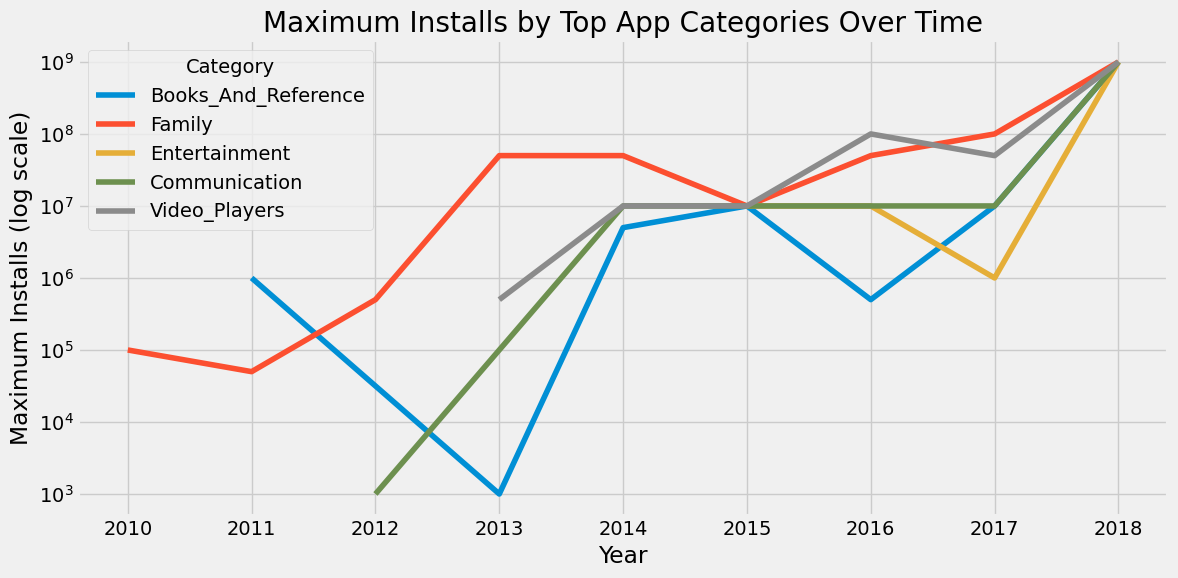

In [73]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=filtered,
    x='Year',
    y='Installs',
    hue='Category',
)
plt.yscale('log')
plt.title('Maximum Installs by Top App Categories Over Time')
plt.xlabel('Year')
plt.ylabel('Maximum Installs (log scale)')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

This `Lineplot` displays the maximum number of installs per year for the top app categories on the Play store from 2010 to 2018. 

**Rising Trend:** Most categories show a sharp increase in their maximum installs over the years, especially after 2014. By 2018, all shown categories approach the highest install bracket, reflecting the enhanced growth of mobile usage.

**Categories Differences:**
- Family: Consistently leads in maximum installs, reaching high values earlier than others and also maintaining a strong upward trend.
- Books_And_Reference and Entertainment show more fluctuation, with some years of lower installs before catching up.
- Communication and Video_Players also show significant growth, especially after 2014.

The graph shows the dynamic rise in popularity of top apps categories on Play Store, with major categories achieving massive installs by the year 2018. 

#### 7) Median Installs of Paid Apps by Category

In [74]:
paid_apps=playstore_copy[playstore_copy['Price']>0]
paid_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Current Ver,Android Ver,Month,Year,Day,Weekday
234,TurboScan: scan documents and receipts in PDF,Business,4.70,11442,6800000.0,100000,Paid,4.99,Everyone,1.5.2,4.0 and up,3,2018,25,Sunday
235,Tiny Scanner Pro: PDF Doc Scan,Business,4.80,10295,39000000.0,100000,Paid,4.99,Everyone,3.4.6,3.0 and up,4,2017,11,Tuesday
427,Puffin Browser Pro,Communication,4.00,18247,34444000.0,100000,Paid,3.99,Everyone,7.5.3.20547,4.1 and up,7,2018,5,Thursday
476,"Moco+ - Chat, Meet People",Dating,4.20,1545,27800000.0,10000,Paid,3.99,Mature 17+,2.6.139,4.1 and up,6,2018,19,Tuesday
477,Calculator,Dating,2.60,57,6200000.0,1000,Paid,6.99,Everyone,1.1.6,4.0 and up,10,2017,25,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,Family,3.92,17,157000.0,100,Paid,0.99,Mature 17+,1.2,2.1 and up,11,2015,25,Wednesday
10760,Fast Tract Diet,Health_And_Fitness,4.40,35,2400000.0,1000,Paid,7.99,Everyone,1.9.3,4.2 and up,8,2018,8,Wednesday
10782,Trine 2: Complete Story,Game,3.80,252,11000000.0,10000,Paid,16.99,Teen,2.22,5.0 and up,2,2015,27,Friday
10785,"sugar, sugar",Family,4.20,1405,9500000.0,10000,Paid,1.20,Everyone,2.7,2.3 and up,6,2018,5,Tuesday


In [75]:
median_installs=paid_apps.groupby(['Category'])['Installs'].median().reset_index().sort_values(by='Installs',ascending=False).head(20)
median_installs

,Category,Installs
7,Entertainment,100000.0
29,Weather,100000.0
6,Education,50500.0
11,Food_And_Drink,30000.0
19,Parenting,25050.0
12,Game,10000.0
16,Maps_And_Navigation,10000.0
28,Video_Players,10000.0
13,Health_And_Fitness,10000.0
23,Shopping,5050.0


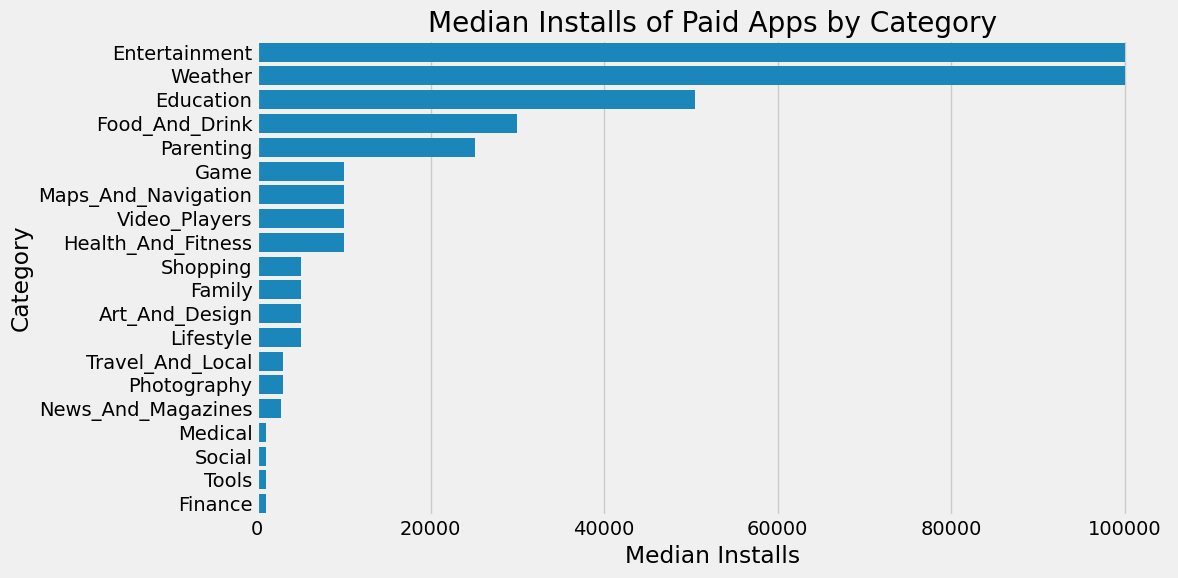

In [76]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=median_installs,
    x='Installs',
    y='Category',
)
plt.title('Median Installs of Paid Apps by Category')
plt.xlabel('Median Installs')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

The `Horizontal bar plot` shows the median number of installs of paid apps across different categories. 

Most categories have relatively low median installs for paid apps. This is expected as the majority of Play Store apps are free, and user tend to prefer free options unless the paid apps provides a significant added value.

Despite `Family` category having highest installs overall, it's paid apps have a much lower median install counts. This could be due to :
- Fewer paid apps in this category.
- Free alternatives providing similar value, reducing the incentive to pay for the apps

**Entertainment:** Apps that fall under the Entertainment category have a median installs that is the highest. This indicates that users are more willing to pay for premium services like ad-free content and unique entertainment features.

**Weather:** Surprisingly, people paid for weather apps during 2018, whereas, nowadays there are a lot of reliable weather apps for free. This might have been the case because apps before 2018 were not able to provide accurate weather forecasts. 

**Education:** Education apps also show high median installs among paid apps. This aligns with the idea that parents and learners willing to invest in educational resources, valuing quality content and features that support learning.